In [437]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the option to display all columns
pd.set_option("display.max_columns", None)

In [438]:
# Load the data
customer_profile = pd.read_csv("customer_profile.csv")

In [439]:
customer_profile.isnull().values.any()

False

In [440]:
# customer_profile.dtypes

In [441]:
customer_profile.drop(labels=["Customer ID"], axis=1, inplace=True)
column_churn = customer_profile["Is Churn"]
customer_profile.drop(labels=["Is Churn"], axis=1, inplace=True)
customer_profile.insert(len(customer_profile.columns), "Is Churn", column_churn.values)

In [442]:
customer_profile["Is Churn"] = customer_profile["Is Churn"].astype("category")
customer_profile["RFM_Level"] = customer_profile["RFM_Level"].astype("category")
customer_profile["Segment"] = customer_profile["Segment"].astype("category")
customer_profile["Customer Type"] = customer_profile["Customer Type"].astype("category")
customer_profile["Member card"] = customer_profile["Member card"].astype("category")
customer_profile["Region"] = customer_profile["Region"].astype("category")
customer_profile["Province "] = customer_profile["Province "].astype("category")
customer_profile["Store ID"] = customer_profile["Store ID"].astype("category")
customer_profile["Shipper"] = customer_profile["Shipper"].astype("category")

In [443]:
# customer_profile.dtypes

In [444]:
customer_profile["Is Churn"].value_counts(1) * 100

Is Churn
0    60.606061
1    39.393939
Name: proportion, dtype: float64

In [445]:
customer_profile.describe()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Age,Contribution Margin,Duration,Total Revenue,Total Quantity,Total Profit,Total Discount,Total Shipping Cost,Average Shipping Duration,Category Unique Counts,Sub-Category Unique Counts,Vendor Name Unique Counts,Product ID Unique Counts,Channel Unique Counts,Ship Mode Unique Counts
count,792.000000,792.000000,792.000000,792.000000,792.000000,792.00000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000,792.000000
mean,181.073232,21.407828,127424.259979,2.506313,2.482323,2.50000,277.954545,7.488636,41.419192,88302.469019,1909.140152,127424.259979,81.150253,88409.145787,6368.122028,86.936869,3.956919,2.748737,5.901515,10.525253,18.376263,1.921717,1.003788
std,216.800134,11.230223,75679.149928,1.123234,1.123112,1.11874,117.103941,2.731540,5.324232,53536.279454,337.831149,75679.149928,44.650081,53583.735920,3915.593690,45.879120,0.889180,0.493957,1.839419,3.352734,8.688737,0.268786,0.061468
min,1.000000,1.000000,8659.966000,1.000000,1.000000,1.00000,111.000000,3.000000,28.000000,4521.181740,0.000000,8659.966000,4.000000,4536.181740,300.578100,4.000000,0.523810,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,43.000000,13.000000,71025.616250,1.750000,1.000000,1.75000,194.250000,5.000000,38.000000,48534.871120,1747.750000,71025.616250,50.000000,48625.621120,3549.757335,52.000000,3.480903,3.000000,5.000000,8.000000,12.000000,2.000000,1.000000
50%,111.000000,19.000000,112842.534000,3.000000,2.000000,2.50000,311.000000,8.000000,42.000000,78213.902595,1994.000000,112842.534000,73.000000,78287.402595,5692.251125,80.000000,4.000000,3.000000,6.000000,11.000000,17.000000,2.000000,1.000000
75%,245.250000,28.000000,167962.253750,4.000000,3.000000,3.25000,411.000000,10.000000,44.000000,116405.485835,2145.000000,167962.253750,108.000000,116562.528327,8479.376595,116.000000,4.522353,3.000000,7.000000,13.000000,23.000000,2.000000,1.000000
max,2110.000000,66.000000,454379.186200,4.000000,4.000000,4.00000,444.000000,12.000000,65.000000,314600.094528,2395.000000,454379.186200,265.000000,314913.094528,24678.853052,264.000000,7.000000,3.000000,12.000000,19.000000,47.000000,2.000000,2.000000


In [446]:
# Select numeric columns only
numeric_cols = customer_profile.select_dtypes(include=["int64", "float64"])

# Group by 'Is Churn' and calculate mean
summary_churn = numeric_cols.groupby(customer_profile["Is Churn"])
summary_churn.mean()

/tmp/ipykernel_409421/1178139667.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  summary_churn = numeric_cols.groupby(customer_profile['Is Churn'])


,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Age,Contribution Margin,Duration,Total Revenue,Total Quantity,Total Profit,Total Discount,Total Shipping Cost,Average Shipping Duration,Category Unique Counts,Sub-Category Unique Counts,Vendor Name Unique Counts,Product ID Unique Counts,Channel Unique Counts,Ship Mode Unique Counts
Is Churn,,,,,,,,,,,,,,,,,,,,,,,
0,61.535417,24.377083,143022.015419,3.247917,2.781250,2.766667,355.370833,8.795833,41.250000,99055.494300,2027.479167,143022.015419,91.981250,99176.838050,7134.320299,98.729167,3.954904,2.800000,6.318750,11.358333,20.797917,1.979167,1.004167
1,364.977564,16.839744,103427.713149,1.365385,2.022436,2.089744,158.852564,5.477564,41.679487,71759.353202,1727.080128,103427.713149,64.487179,71843.465381,5189.355457,68.794872,3.960019,2.669872,5.259615,9.243590,14.650641,1.833333,1.003205


In [447]:
summary_churn.median()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score,Age,Contribution Margin,Duration,Total Revenue,Total Quantity,Total Profit,Total Discount,Total Shipping Cost,Average Shipping Duration,Category Unique Counts,Sub-Category Unique Counts,Vendor Name Unique Counts,Product ID Unique Counts,Channel Unique Counts,Ship Mode Unique Counts
Is Churn,,,,,,,,,,,,,,,,,,,,,,,
0,51.0,22.0,134042.3830,3.0,3.0,3.0,344.0,9.0,42.0,92387.131489,2086.5,134042.3830,87.0,92479.131489,6616.87654,92.0,4.0,3.0,6.0,12.0,20.0,2.0,1.0
1,271.0,15.0,92857.3705,1.0,2.0,2.0,132.0,5.0,42.0,62925.998660,1814.5,92857.3705,59.0,62996.998660,4382.93466,62.0,4.0,3.0,5.0,9.0,14.0,2.0,1.0


<Axes: >

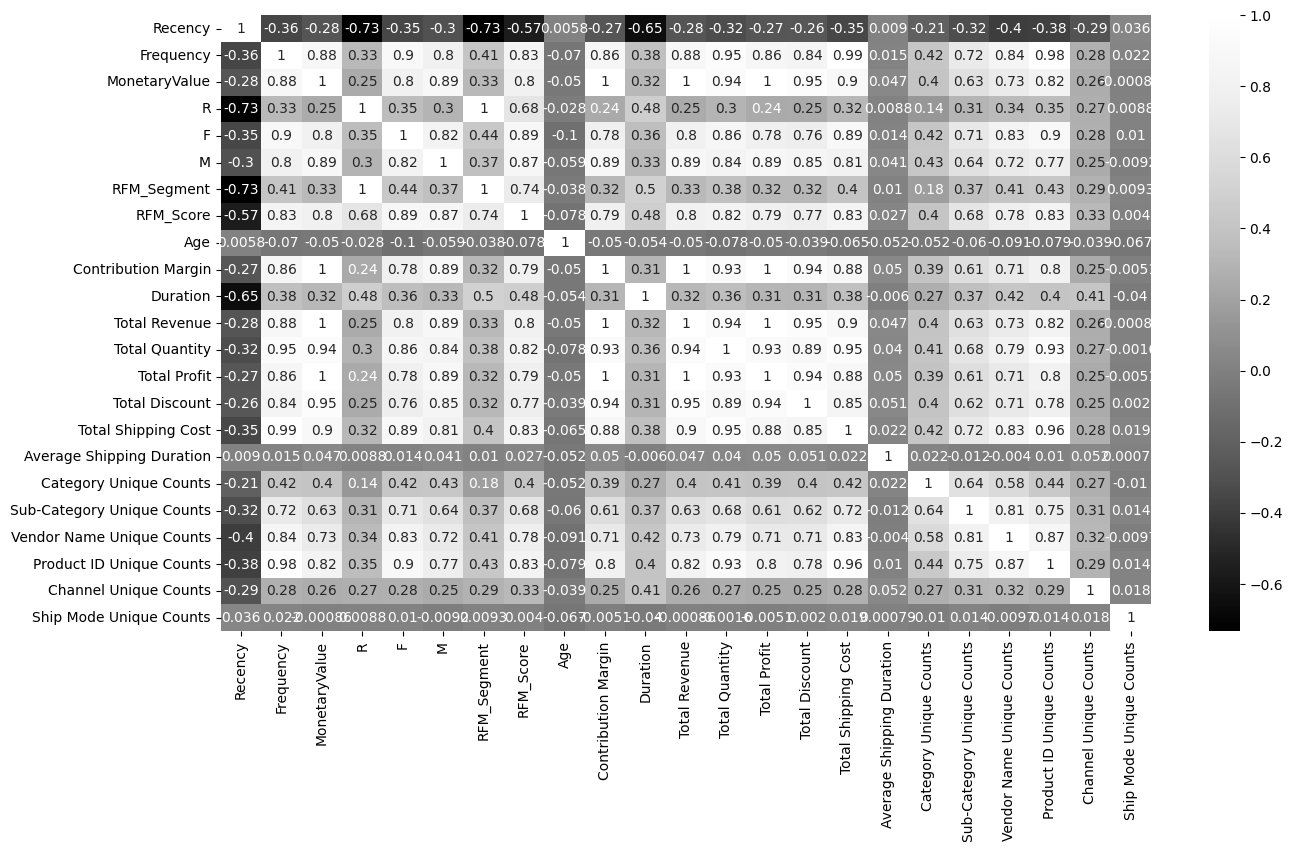

In [448]:
corr = numeric_cols.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(
    corr,
    xticklabels=corr.columns.values,
    yticklabels=corr.columns.values,
    annot=True,
    cmap="Greys_r",
)

# Feature Selection

In [449]:
### Encoding the categorical variables
customer_profile["Is Churn"] = customer_profile["Is Churn"].astype("category").cat.codes
customer_profile["RFM_Level"] = (
    customer_profile["RFM_Level"].astype("category").cat.codes
)
customer_profile["Segment"] = customer_profile["Segment"].astype("category").cat.codes
customer_profile["Customer Type"] = (
    customer_profile["Customer Type"].astype("category").cat.codes
)
customer_profile["Member card"] = (
    customer_profile["Member card"].astype("category").cat.codes
)
customer_profile["Region"] = customer_profile["Region"].astype("category").cat.codes
customer_profile["Province "] = (
    customer_profile["Province "].astype("category").cat.codes
)
customer_profile["Store ID"] = customer_profile["Store ID"].astype("category").cat.codes
customer_profile["Shipper"] = customer_profile["Shipper"].astype("category").cat.codes

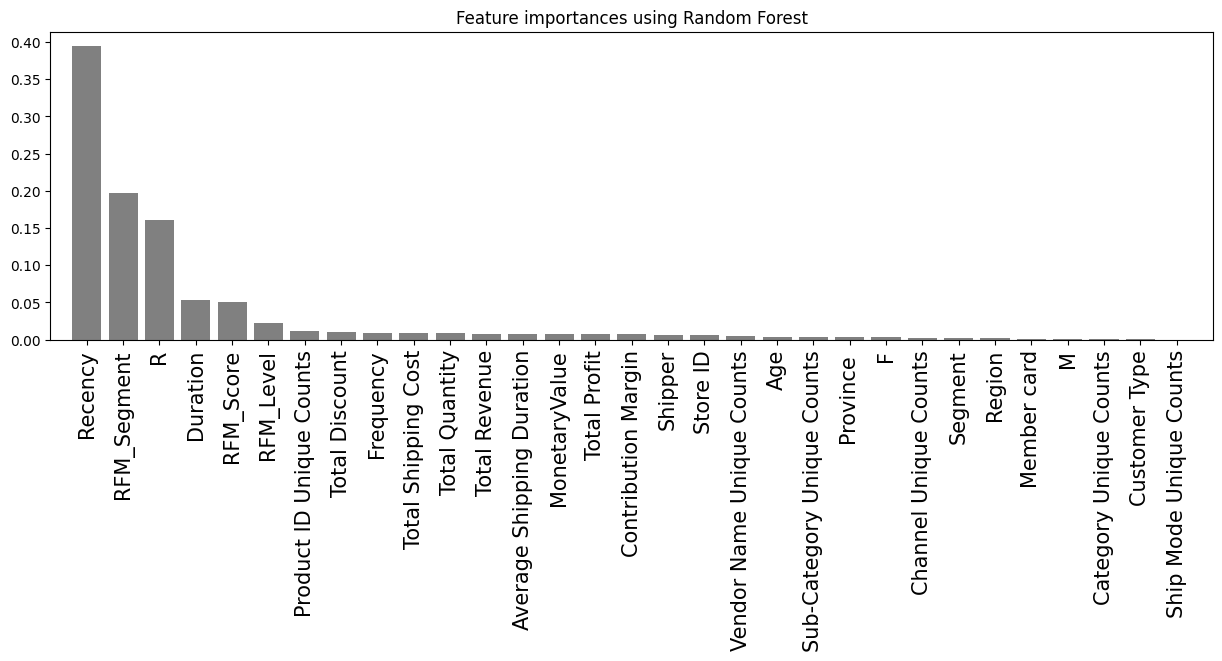

In [450]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

target = "Is Churn"
X = customer_profile.drop(target, axis=1)
y = customer_profile[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123, stratify=y
)

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
features = customer_profile.drop([target], axis=1).columns

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(15, 4))
plt.title("Feature importances using Random Forest")
plt.bar(range(X_train.shape[1]), importances[indices], color="gray", align="center")
plt.xticks(range(X_train.shape[1]), features[indices], rotation="vertical", fontsize=15)
plt.xlim([-1, X_train.shape[1]])
plt.show()

# Build model

In [451]:
from sklearn.linear_model import LogisticRegression

selected_features = [
    # 'Recency',
    "Duration",
    "Product ID Unique Counts",
    "Total Discount",
    # 'Frequency',
    # 'Total Shipping Cost',
    # 'Total Quantity',
    # 'Total Revenue',
]

clf = LogisticRegression(random_state=0, solver="lbfgs").fit(
    X_train[selected_features], y_train
)
clf.predict(X_test[selected_features])
clf.predict_proba(X_test[selected_features])

clf.score(X_test[selected_features], y_test)

0.7421383647798742